## complete Reliance Stock analysis, Simulation and prediction with trading using reinforcement learning
 #### Ved Prakash

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [117]:
rel = pd.read_csv('E:/Important_project/alt_data_and_stock_prediction/stock_project1/RELIANCE.csv')
rel = rel[['Date','Open','High','Low','Close']]

rel.head()

,Date,Open,High,Low,Close
0,2017-08-28,782.111389,783.547729,773.270142,775.920044
1,2017-08-29,773.592102,776.390564,757.816650,758.881531
2,2017-08-30,766.509277,777.034485,763.388855,774.706543
3,2017-08-31,780.105408,791.224976,779.610046,789.763855
4,2017-09-01,792.413696,800.710083,791.992676,797.490601


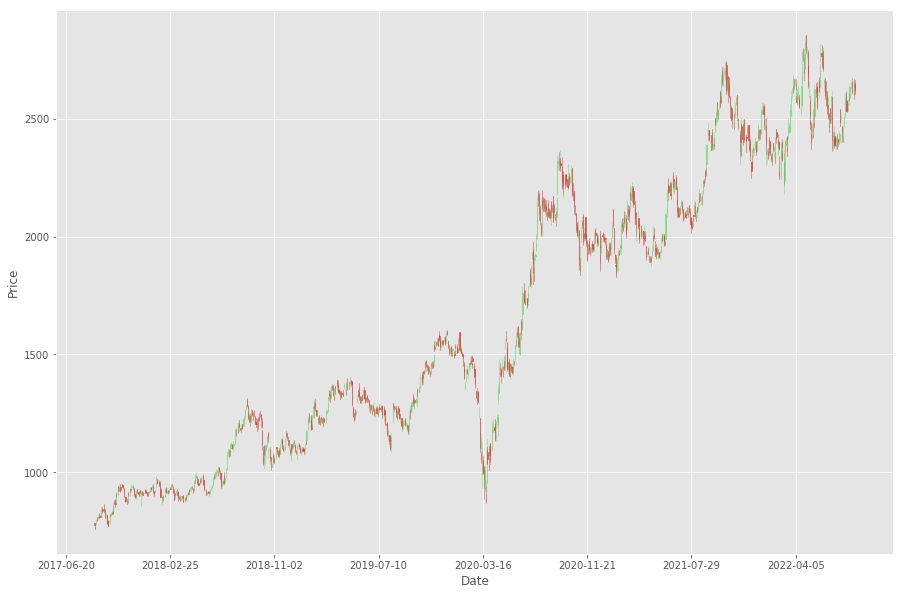

In [43]:
import matplotlib.ticker as mticker
from mplfinance.original_flavor import candlestick_ohlc
from datetime import date
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import yfinance as yf
import finplot as fplt

df_cp = rel.copy()
df_cp.Date = date2num(pd.to_datetime(rel.Date).dt.to_pydatetime())
ax1 = plt.subplot2grid((1,1), (0,0))
candlestick_ohlc(ax1,df_cp.values, width=0.4, colorup='#77d879', colordown='#db3f3f',alpha=2)
x_range = np.arange(df_cp.shape[0])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.grid(True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

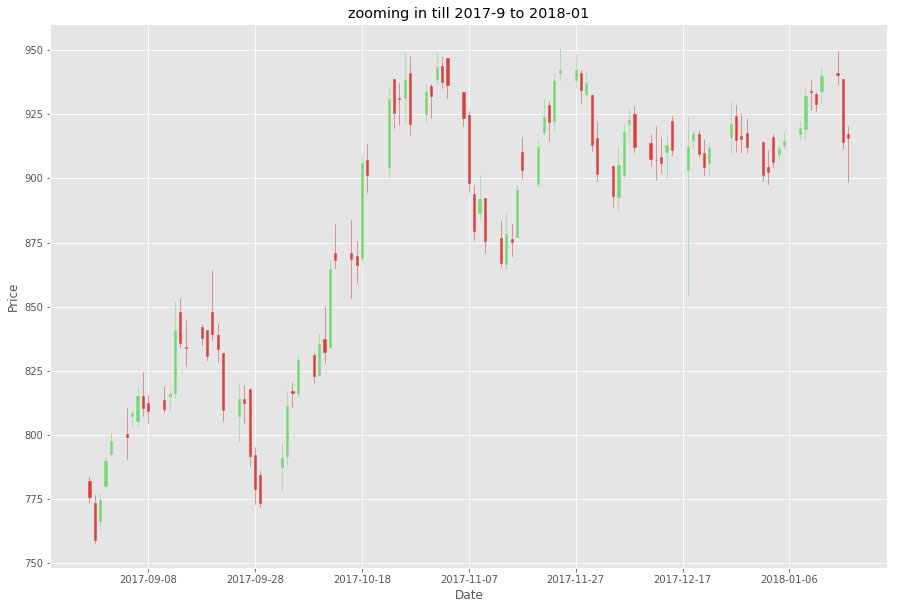

In [45]:
ax1 = plt.subplot2grid((1,1), (0,0))
ret=candlestick_ohlc(ax1,df_cp.iloc[:100,:].values, width=0.4, colorup='#77d879', colordown='#db3f3f',alpha=2)
x_range = np.arange(df_cp.shape[0])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.grid(True)
plt.title('zooming in till 2017-9 to 2018-01')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [74]:
rel["Date"]= pd.to_datetime(rel["Date"])

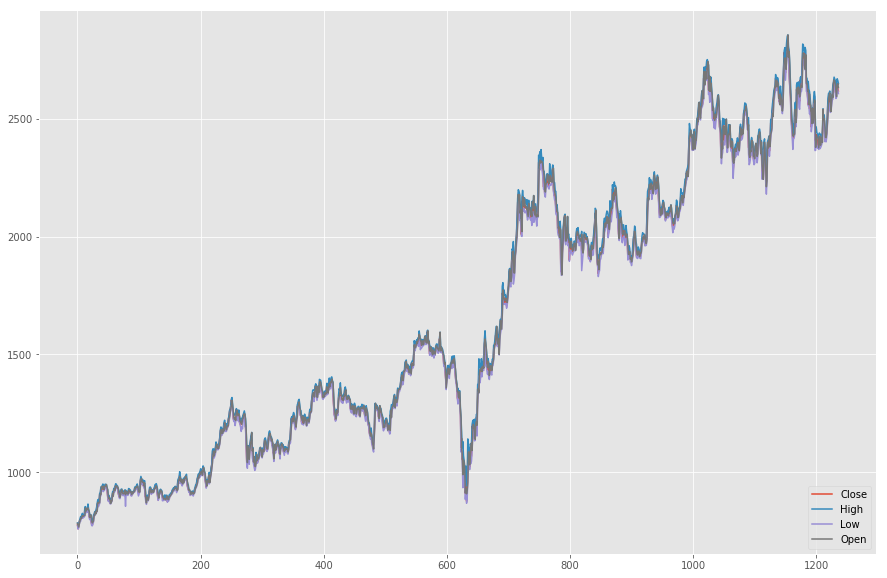

In [81]:
ax1 = plt.subplot2grid((1,1), (0,0))
ax1.plot(df_cp['Close'])
ax1.plot(df_cp['High'])
ax1.plot(df_cp['Low'])
ax1.plot(df_cp['Open'])

ax1.legend(loc ='lower right')
plt.show()

In [75]:
rel['Closelog'] = np.log(rel.Close)
rel.head()

,Date,Open,High,Low,Close,Closelog
0,2017-08-28,782.111389,783.547729,773.270142,775.920044,6.654049
1,2017-08-29,773.592102,776.390564,757.816650,758.881531,6.631846
2,2017-08-30,766.509277,777.034485,763.388855,774.706543,6.652484
3,2017-08-31,780.105408,791.224976,779.610046,789.763855,6.671734
4,2017-09-01,792.413696,800.710083,791.992676,797.490601,6.681470


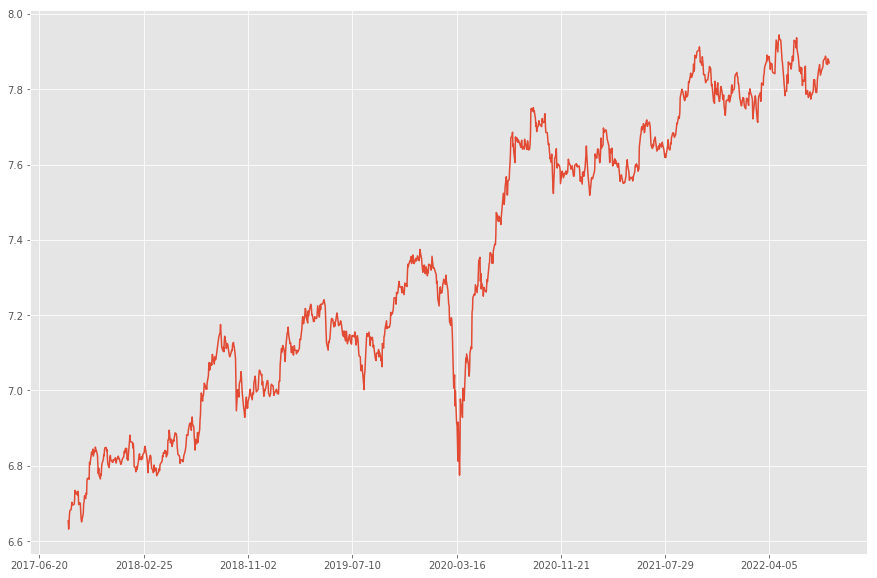

In [72]:
ax1 = plt.subplot2grid((1,1), (0,0))

ax1.plot(rel['Date'],rel['Closelog'])

x_range = np.arange(df_cp.shape[0])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
plt.show()


## yearwise analysis

In [88]:
rel_2017=rel[rel['Date'].dt.year == 2017]
rel_2018=rel[rel['Date'].dt.year == 2018]
rel_2019=rel[rel['Date'].dt.year == 2019]
rel_2020=rel[rel['Date'].dt.year == 2020]
rel_2021=rel[rel['Date'].dt.year == 2021]

In [96]:
rel['year'] = pd.DatetimeIndex(rel['Date']).year
rel['months'] = pd.DatetimeIndex(rel['Date']).month

In [107]:
rel_month_wise_close = pd.pivot_table(rel, values = "Close", columns = "year", index='months')

In [108]:
rel_month_wise_close

year,2017,2018,2019,2020,2021,2022
months,,,,,,
1,NaN,931.562897,1149.163606,1502.899679,1957.662494,2451.782544
2,NaN,913.715210,1238.051359,1427.307386,2011.252509,2367.997498
3,NaN,900.336757,1307.415337,1091.105027,2097.033349,2459.750000
4,NaN,926.411394,1349.067447,1259.761481,1961.278956,2672.586863
5,NaN,939.127552,1302.008256,1459.851575,1972.582513,2566.538086
6,NaN,975.305083,1291.750231,1632.231823,2188.272705,2624.811368
7,NaN,1059.353843,1245.956968,1939.930436,2091.300008,2430.821429
8,774.817993,1217.365345,1216.392322,2110.792899,2153.309512,2610.016683
9,814.197696,1229.146145,1225.439338,2214.381836,2425.345250,NaN


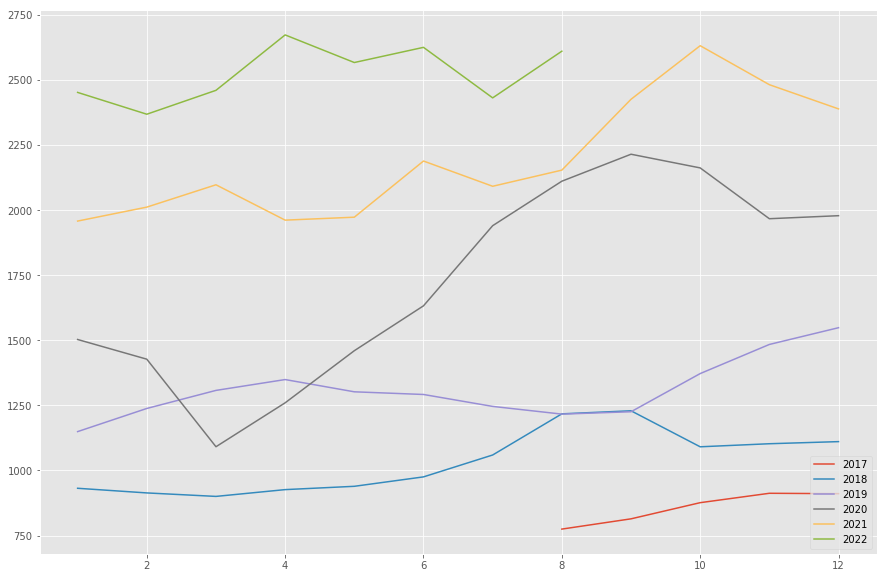

In [113]:
ax2 = plt.subplot2grid((1,1), (0,0))
ax2.plot(rel_month_wise_close[2017])
ax2.plot(rel_month_wise_close[2018])
ax2.plot(rel_month_wise_close[2019])
ax2.plot(rel_month_wise_close[2020])
ax2.plot(rel_month_wise_close[2021])
ax2.plot(rel_month_wise_close[2022])

ax2.legend(loc ='lower right')
plt.show()

## Outlier detection

In [120]:
def df_shift(df,lag=0, start=1, skip=1, rejected_columns = []):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(start,lag+1,skip):
        for x in list(df.columns):
            if x not in rejected_columns:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = (skip - 1)
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=skip
        df = pd.concat([df, dfn], axis=1)
    return df

In [121]:
rel_cross = rel[['Date','Close']]

In [122]:
df_crosscorrelated = df_shift(rel_cross, lag = 10, start = 1, skip = 2,rejected_columns=['Date'])

In [127]:
df_crosscorrelated['ma7'] = df_crosscorrelated['Close'].rolling(7).mean()
df_crosscorrelated['ma14'] = df_crosscorrelated['Close'].rolling(14).mean()
df_crosscorrelated['ma25'] = df_crosscorrelated['Close'].rolling(25).mean()
df_crosscorrelated.head(30)

,Date,Close,Close_1,Close_3,Close_5,Close_7,Close_9,ma7,ma14,ma25
0,2017-08-28,775.920044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-08-29,758.881531,775.920044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-30,774.706543,758.881531,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-08-31,789.763855,774.706543,775.920044,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-09-01,797.490601,789.763855,758.881531,NaN,NaN,NaN,NaN,NaN,NaN
5,2017-09-04,799.100342,797.490601,774.706543,775.920044,NaN,NaN,NaN,NaN,NaN
6,2017-09-05,808.634949,799.100342,789.763855,758.881531,NaN,NaN,786.356838,NaN,NaN
7,2017-09-06,814.974854,808.634949,797.490601,774.706543,775.920044,NaN,791.936096,NaN,NaN
8,2017-09-07,810.418030,814.974854,799.100342,789.763855,758.881531,NaN,799.298453,NaN,NaN
9,2017-09-08,809.229309,810.418030,808.634949,797.490601,774.706543,775.920044,804.230277,NaN,NaN


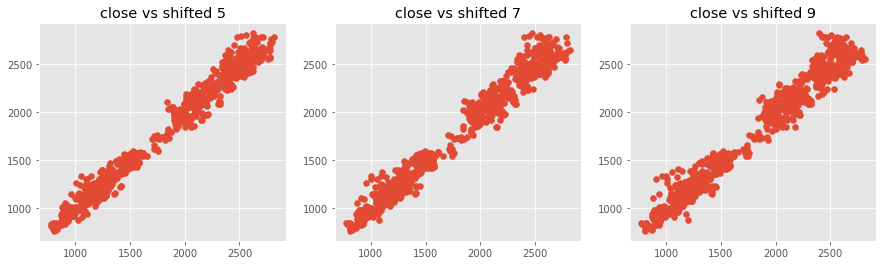

In [128]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_5'])
plt.title('close vs shifted 5')
plt.subplot(1,3,2)
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_7'])
plt.title('close vs shifted 7')
plt.subplot(1,3,3)
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_9'])
plt.title('close vs shifted 9')
plt.show()

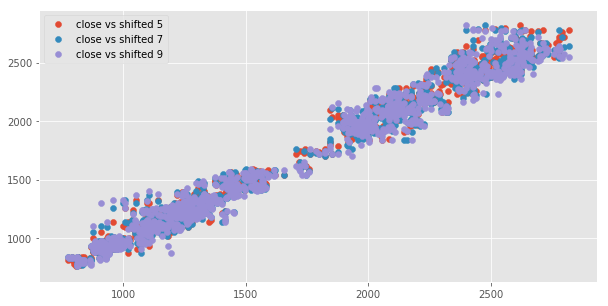

In [129]:
plt.figure(figsize=(10,5))
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_5'],label='close vs shifted 5')
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_7'],label='close vs shifted 7')
plt.scatter(df_crosscorrelated['Close'],df_crosscorrelated['Close_9'],label='close vs shifted 9')
plt.legend()
plt.show()

In [135]:
df_crosscorrelated["Date"]= pd.to_datetime(df_crosscorrelated["Date"])

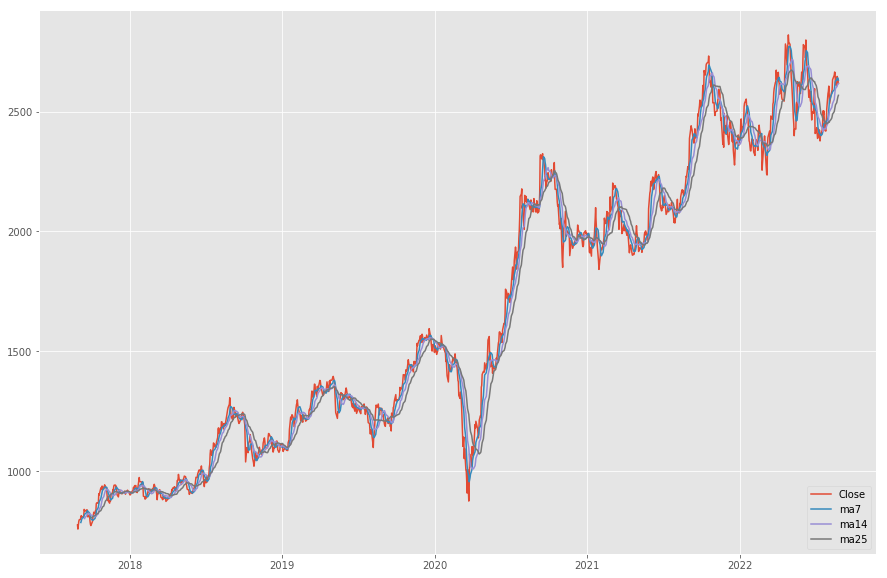

In [137]:
ax1 = plt.subplot2grid((1,1), (0,0))
ax1.plot(df_crosscorrelated["Date"],df_crosscorrelated['Close'])
ax1.plot(df_crosscorrelated["Date"],df_crosscorrelated['ma7'])
ax1.plot(df_crosscorrelated["Date"],df_crosscorrelated['ma14'])
ax1.plot(df_crosscorrelated["Date"],df_crosscorrelated['ma25'])

ax1.legend(loc ='lower right')
plt.show()

In [139]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()

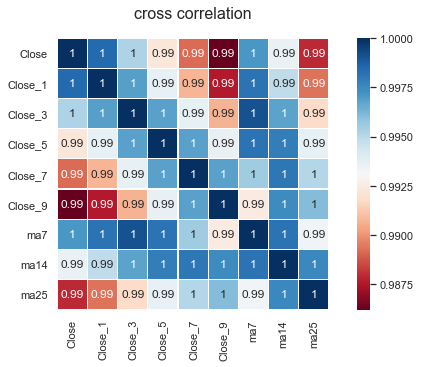

In [141]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10, 5))
ax=plt.subplot(111)
plt.title('cross correlation', y=1.05, size=16)
selected_column = ['Close','Close_1','Close_3','Close_5','Close_7','Close_9','ma7','ma14','ma25']

sns.heatmap(df_crosscorrelated[selected_column].corr(), ax=ax, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

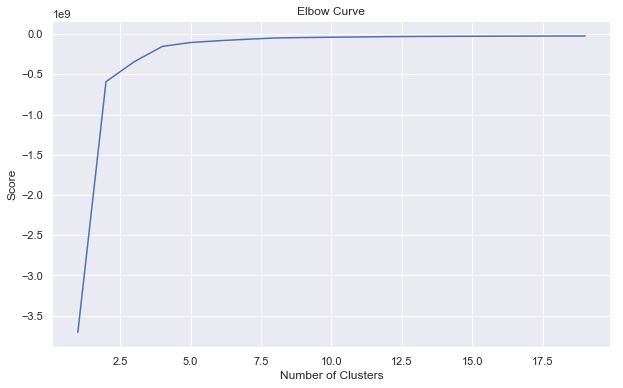

In [164]:
from sklearn.cluster import KMeans

n_cluster = range(1, 20)
data = df_crosscorrelated.iloc[:,1:].dropna().values
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [166]:
data[1]

array([790.853516  , 773.567383  , 791.645996  , 813.835632  ,
       833.449707  , 830.725525  , 795.87023929, 815.92300857,
       808.49428236])

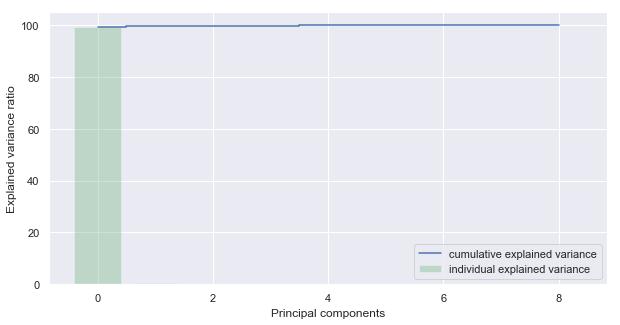

In [171]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df_crosscorrelated.iloc[:,1:].dropna().values
X_std = StandardScaler().fit_transform(X)

mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key = lambda x: x[0], reverse= True)

tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()


In [172]:
X = df_crosscorrelated.iloc[:,1:].dropna().values
X_std = StandardScaler().fit_transform(X)
data = pd.DataFrame(X_std)
pca = PCA(n_components=2)
data = pca.fit_transform(data)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)

In [173]:
df = df_crosscorrelated.dropna()
kmeans = KMeans(n_clusters=10).fit(np_scaled)
df['cluster'] = kmeans.predict(np_scaled)
df = df.reset_index()
df['principal_feature1'] = np_scaled[:,0]
df['principal_feature2'] = np_scaled[:,1]
df['cluster'].value_counts()

9    230
5    180
0    177
3    159
1    153
4     89
2     85
7     65
8     64
6     11
Name: cluster, dtype: int64

In [191]:
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = data[i]
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.at[i]=np.linalg.norm(Xa-Xb)
    return distance

outliers_fraction = 0.3
distance = getDistanceByPoint(np_scaled, kmeans)
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
df['anomaly1'] = (distance >= threshold).astype(int)

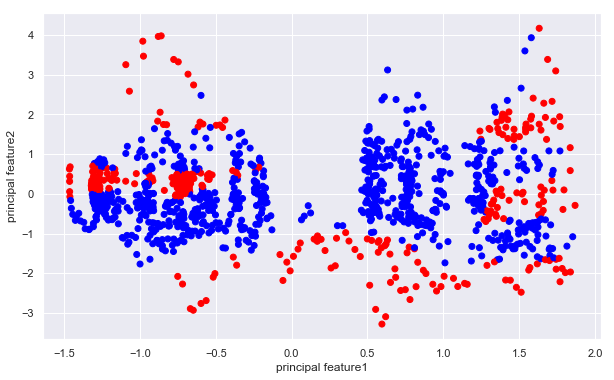

In [192]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show()

In [186]:
df.anomaly1.value_counts()

0    1177
1      36
Name: anomaly1, dtype: int64

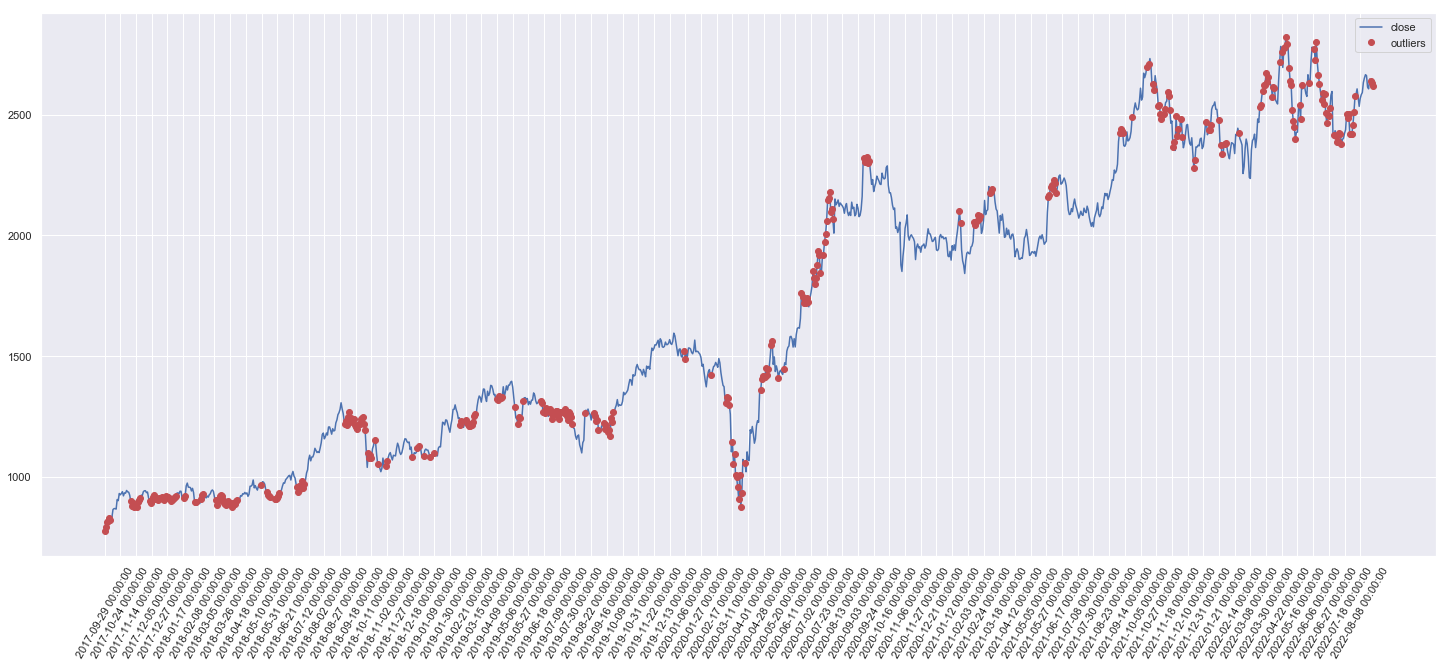

In [215]:
plt.figure(figsize=(25, 10))
plt.plot(df['Close'], label='close',c='b')
plt.plot(df['Close'], 'o', label='outliers',markevery=df.loc[df['anomaly1'] == 1].index.tolist(),c='r')
plt.xticks(np.arange(df.shape[0])[::15],pd.DatetimeIndex(df['Date'][::15]),rotation='60')
plt.legend()
plt.show()

C:\Users\india\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
C:\Users\india\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1395: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


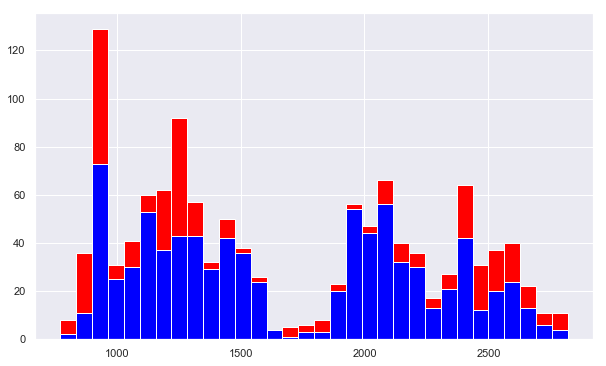

In [216]:
a = df.loc[df['anomaly1'] == 0, 'Close']
b = df.loc[df['anomaly1'] == 1, 'Close']

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.show()

## monte-carlo-drift simulation

In [217]:
from tqdm import tqdm

In [218]:
number_simulation = 100
predict_day = 30

close = rel['Close'].tolist()
returns = pd.DataFrame(close).pct_change()
last_price = close[-1]
results = pd.DataFrame()
avg_daily_ret = returns.mean()
variance = returns.var()
daily_vol = returns.std()
daily_drift = avg_daily_ret - (variance / 2)
drift = daily_drift - 0.5 * daily_vol ** 2


In [223]:
for i in tqdm(range(number_simulation)):
    prices = []
    prices.append(df.Close.iloc[-1])
    for d in range(predict_day):
        shock = [drift + daily_vol * np.random.normal()]
        shock = np.mean(shock)
        price = prices[-1] * np.exp(shock)
        prices.append(price)
    results[i] = prices

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 51.51it/s]


In [244]:
results

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,mean
0,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,...,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000
1,2594.809975,2681.819271,2582.906842,2518.272249,2586.217376,2620.228188,2554.833050,2687.701090,2641.648660,2627.170094,...,2662.437158,2609.447911,2648.697109,2479.101150,2634.722900,2603.917933,2625.324610,2627.320923,2622.993326,2619.777593
2,2653.743970,2737.622472,2618.748862,2474.873470,2573.541471,2672.940968,2570.758142,2660.802396,2705.060022,2619.783875,...,2635.777503,2606.831790,2644.165049,2456.317228,2672.348004,2655.069191,2602.829472,2602.430426,2637.014089,2622.776121
3,2673.964957,2755.712952,2562.794069,2454.340552,2641.208607,2718.605727,2555.238623,2691.331590,2723.546757,2600.963552,...,2591.085292,2608.473679,2643.515593,2483.212878,2701.014150,2703.206173,2675.805752,2607.981665,2624.194449,2631.398795
4,2598.262742,2783.720984,2460.493625,2346.689190,2658.413944,2693.742071,2424.436675,2745.416240,2762.902878,2608.820252,...,2588.547828,2603.955589,2606.100164,2549.906361,2704.724260,2684.590642,2791.955896,2665.038582,2645.385832,2629.182817
5,2562.438221,2712.743028,2438.757615,2317.589616,2771.026822,2738.664260,2453.962222,2769.883609,2694.777235,2616.445622,...,2738.957863,2599.388412,2624.158486,2598.784560,2742.046620,2822.065248,2808.597114,2690.559542,2619.686111,2632.942676
6,2523.792212,2660.455249,2369.391674,2248.337264,2801.995453,2603.374265,2491.491644,2824.112775,2668.494816,2550.219792,...,2682.851616,2742.615295,2629.091693,2693.334265,2772.626995,2756.553829,2780.838490,2701.663364,2688.850892,2633.359266
7,2520.936327,2667.346512,2341.476407,2241.479731,2718.032537,2534.588091,2494.718258,2769.913466,2662.703120,2555.752013,...,2574.115398,2748.131302,2672.926644,2693.750714,2776.587229,2824.630192,2855.646941,2700.844908,2686.743508,2638.715455
8,2492.833836,2662.386527,2303.006595,2205.856088,2647.705967,2506.648370,2537.832999,2791.295078,2625.718828,2526.626660,...,2591.058633,2695.023729,2541.333121,2793.578356,2839.856123,2720.231669,2962.953926,2655.218900,2649.250695,2635.217665
9,2488.446342,2655.270372,2269.069212,2248.010172,2628.945935,2579.855731,2646.614930,2831.688403,2635.574579,2447.310377,...,2586.042657,2728.686788,2551.561819,2692.366003,2869.401683,2717.686166,2953.568694,2641.029730,2686.147523,2640.430559


In [243]:
results['mean']= results[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]].mean(axis=1)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64')

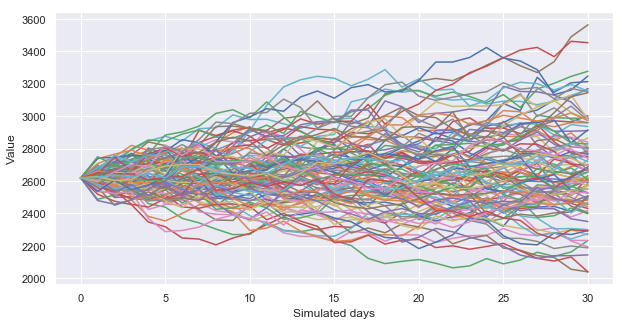

In [257]:
plt.figure(figsize=(10,5))
plt.plot(results.iloc[:,:-1])
# plt.plot(mean(results))
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.show()


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,...,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000
1,2594.809975,2681.819271,2582.906842,2518.272249,2586.217376,2620.228188,2554.833050,2687.701090,2641.648660,2627.170094,...,2536.698308,2662.437158,2609.447911,2648.697109,2479.101150,2634.722900,2603.917933,2625.324610,2627.320923,2622.993326
2,2653.743970,2737.622472,2618.748862,2474.873470,2573.541471,2672.940968,2570.758142,2660.802396,2705.060022,2619.783875,...,2604.864995,2635.777503,2606.831790,2644.165049,2456.317228,2672.348004,2655.069191,2602.829472,2602.430426,2637.014089
3,2673.964957,2755.712952,2562.794069,2454.340552,2641.208607,2718.605727,2555.238623,2691.331590,2723.546757,2600.963552,...,2547.202890,2591.085292,2608.473679,2643.515593,2483.212878,2701.014150,2703.206173,2675.805752,2607.981665,2624.194449
4,2598.262742,2783.720984,2460.493625,2346.689190,2658.413944,2693.742071,2424.436675,2745.416240,2762.902878,2608.820252,...,2573.531932,2588.547828,2603.955589,2606.100164,2549.906361,2704.724260,2684.590642,2791.955896,2665.038582,2645.385832
5,2562.438221,2712.743028,2438.757615,2317.589616,2771.026822,2738.664260,2453.962222,2769.883609,2694.777235,2616.445622,...,2625.031306,2738.957863,2599.388412,2624.158486,2598.784560,2742.046620,2822.065248,2808.597114,2690.559542,2619.686111
6,2523.792212,2660.455249,2369.391674,2248.337264,2801.995453,2603.374265,2491.491644,2824.112775,2668.494816,2550.219792,...,2775.797831,2682.851616,2742.615295,2629.091693,2693.334265,2772.626995,2756.553829,2780.838490,2701.663364,2688.850892
7,2520.936327,2667.346512,2341.476407,2241.479731,2718.032537,2534.588091,2494.718258,2769.913466,2662.703120,2555.752013,...,2666.515771,2574.115398,2748.131302,2672.926644,2693.750714,2776.587229,2824.630192,2855.646941,2700.844908,2686.743508
8,2492.833836,2662.386527,2303.006595,2205.856088,2647.705967,2506.648370,2537.832999,2791.295078,2625.718828,2526.626660,...,2731.337207,2591.058633,2695.023729,2541.333121,2793.578356,2839.856123,2720.231669,2962.953926,2655.218900,2649.250695
9,2488.446342,2655.270372,2269.069212,2248.010172,2628.945935,2579.855731,2646.614930,2831.688403,2635.574579,2447.310377,...,2710.729159,2586.042657,2728.686788,2551.561819,2692.366003,2869.401683,2717.686166,2953.568694,2641.029730,2686.147523


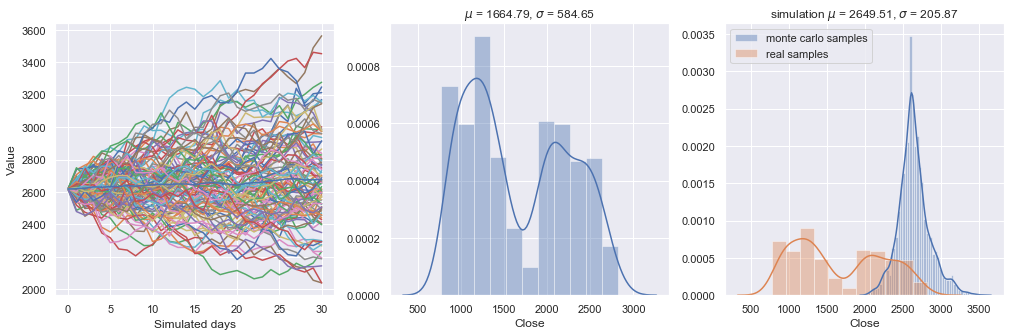

In [253]:
raveled = results.values.ravel()
raveled.sort()
cp_raveled = raveled.copy()

plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.subplot(1,3,2)
sns.distplot(df.Close,norm_hist=True)
plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(df.Close.mean(),df.Close.std()))
plt.subplot(1,3,3)
sns.distplot(raveled,norm_hist=True,label='monte carlo samples')
sns.distplot(df.Close,norm_hist=True,label='real samples')
plt.title('simulation $\mu$ = %.2f, $\sigma$ = %.2f'%(raveled.mean(),raveled.std()))
plt.legend()
plt.show()

### Using LSTM to predict the stock

In [261]:
## model building using LSTM
import tensorflow as tf
from keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential

In [268]:
train_open= rel.iloc[:, 1:2].values[:1100]
test_open=rel.iloc[:, 1:2].values[1100:]

In [271]:
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
train_open_scaled= ss.fit_transform(train_open)

In [272]:
xtrain=[]
ytrain=[]
for i in range(60,len(train_open_scaled)):
    xtrain.append(train_open_scaled[i-60:i,0])
    ytrain.append(train_open_scaled[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [274]:
xtrain.shape

(1040, 60)

In [276]:
ytrain.shape

(1040,)

In [277]:
#initialisizng the model 
regression= Sequential()

#First Input layer and LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Dropout(0.2))

# Where:
#     return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.

# Second LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Third LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))
#Output layer , we wont pass any activation as its continous value model
regression.add(Dense(units=1))

#Compiling the network
regression.compile(optimizer='adam',loss='mean_squared_error')


#fitting the network
regression.fit(xtrain,ytrain,batch_size=30,epochs=100)

Epoch 1/100
35/35 [==============================] - 11s 80ms/step - loss: 0.0373
Epoch 2/100
35/35 [==============================] - 3s 78ms/step - loss: 0.0056
Epoch 3/100
35/35 [==============================] - 3s 79ms/step - loss: 0.0052
Epoch 4/100
35/35 [==============================] - 3s 78ms/step - loss: 0.0051
Epoch 5/100
35/35 [==============================] - 3s 77ms/step - loss: 0.0048
Epoch 6/100
35/35 [==============================] - 3s 77ms/step - loss: 0.0042
Epoch 7/100
35/35 [==============================] - 3s 77ms/step - loss: 0.0044
Epoch 8/100
35/35 [==============================] - 3s 78ms/step - loss: 0.0045
Epoch 9/100
35/35 [==============================] - 3s 77ms/step - loss: 0.0042
Epoch 10/100
35/35 [==============================] - 3s 81ms/step - loss: 0.0046
Epoch 11/100
35/35 [==============================] - 3s 100ms/step - loss: 0.0043
Epoch 12/100
35/35 [==============================] - 3s 91ms/step - loss: 0.0039
Epoch 13/100
35/35 [===

In [ ]:
test_open_scaled= ss.fit_transform(test_open)

In [282]:
xtest=[]
ytest=[]
for i in range(60,len(test_open_scaled)):
    xtest.append(test_open_scaled[i-60:i,0])
    ytest.append(test_open_scaled[i,0])

xtest, ytest = np.array(xtest), np.array(ytest)

In [284]:
predicted_value=regression.predict(xtest)

3/3 [==============================] - 0s 24ms/step


In [286]:
real_predicted_value=ss.inverse_transform(predicted_value)

In [293]:
actual_value=test_open[60:]

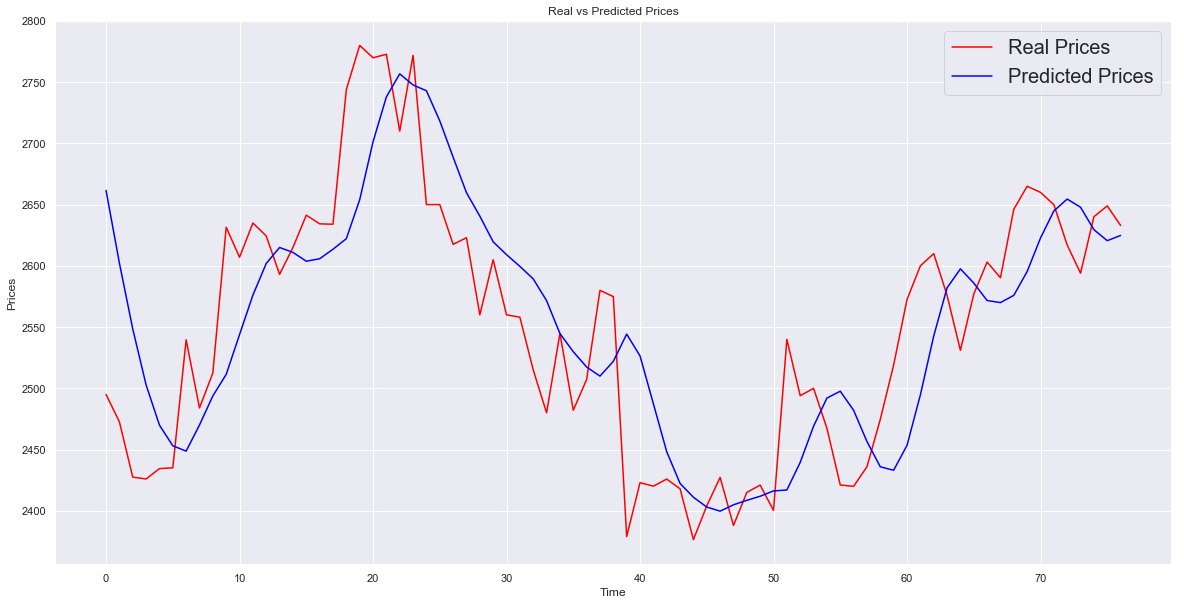

In [295]:
plt.figure(figsize=(20,10))
plt.plot(actual_value,'red',label='Real Prices')
plt.plot(real_predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)
plt.show()

 ## conclusion:
  <li> need more data for better prediction </li>
  <li> it catch some pattern </li>

### creating bot to trade using policy gradiant agent (reinforcement learning)

In [ ]:
class Agent:

    LEARNING_RATE = 1e-4
    LAYER_SIZE = 256
    GAMMA = 0.9
    OUTPUT_SIZE = 3

    def __init__(self, state_size, window_size, trend, skip):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        self.X = tf.placeholder(tf.float32, (None, self.state_size))
        self.REWARDS = tf.placeholder(tf.float32, (None))
        self.ACTIONS = tf.placeholder(tf.int32, (None))
        feed_forward = tf.layers.dense(self.X, self.LAYER_SIZE, activation = tf.nn.relu)
        self.logits = tf.layers.dense(feed_forward, self.OUTPUT_SIZE, activation = tf.nn.softmax)
        input_y = tf.one_hot(self.ACTIONS, self.OUTPUT_SIZE)
        loglike = tf.log((input_y * (input_y - self.logits) + (1 - input_y) * (input_y + self.logits)) + 1)
        rewards = tf.tile(tf.reshape(self.REWARDS, (-1,1)), [1, self.OUTPUT_SIZE])
        self.cost = -tf.reduce_mean(loglike * (rewards + 1)) 
        self.optimizer = tf.train.AdamOptimizer(learning_rate = self.LEARNING_RATE).minimize(self.cost)
        self.sess = tf.InteractiveSession()
        self.sess.run(tf.global_variables_initializer())
    
    def predict(self, inputs):
        return self.sess.run(self.logits, feed_dict={self.X:inputs})
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array([res])
    
    def discount_rewards(self, r):
        discounted_r = np.zeros_like(r)
        running_add = 0
        for t in reversed(range(0, r.size)):
            running_add = running_add * self.GAMMA + r[t]
            discounted_r[t] = running_add
        return discounted_r
    
    def get_predicted_action(self, sequence):
        prediction = self.predict(np.array(sequence))[0]
        return np.argmax(prediction)
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.get_predicted_action(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
                
                
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            state = next_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
        
    
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            ep_history = []
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            for t in range(0, len(self.trend) - 1, self.skip):
                action = self.get_predicted_action(state)
                next_state = self.get_state(t + 1)
                if action == 1 and starting_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                    inventory.append(self.trend[t])
                    starting_money -= close[t]
                
                elif action == 2 and len(inventory):
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                ep_history.append([state,action,starting_money,next_state])
                state = next_state
            ep_history = np.array(ep_history)
            ep_history[:,2] = self.discount_rewards(ep_history[:,2])
            cost, _ = self.sess.run([self.cost, self.optimizer], feed_dict={self.X:np.vstack(ep_history[:,0]),
                                                    self.REWARDS:ep_history[:,2],
                                                    self.ACTIONS:ep_history[:,1]})
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))